Authors: Michael Gamston

### This Jupyter Notebook file explores iris dataset.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
import sklearn

In [14]:
iris_df=pd.read_csv('iris_data/iris.data', index_col=False, names=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])
iris_df.head()
#1. sepal length in cm
#2. sepal width in cm
#3. petal length in cm
#4. petal width in cm

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#data base has no null entries 
iris_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#Checking what classes we have and the split of data 
iris_df['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
#changing our string labeles to intergers, saving them in a dict
labels = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2,
}
iris_df['Class']= iris_df['Class'].replace('Iris-setosa',0, regex=True)
iris_df['Class']= iris_df['Class'].replace('Iris-versicolor',1, regex=True)
iris_df['Class']= iris_df['Class'].replace('Iris-virginica',2, regex=True)

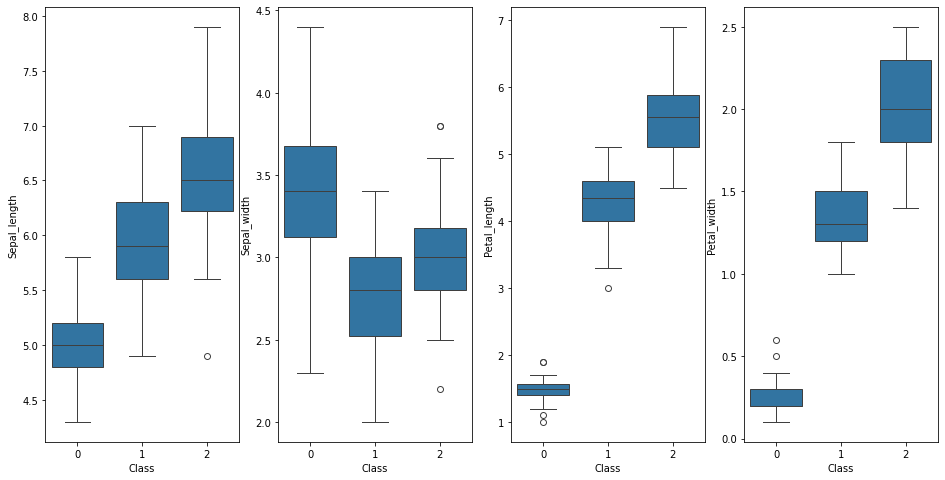

In [31]:
#Using this graph we can see that most classes are high differnetaiable with 
# most classes having it's own group of correlatable data within the feature  
# the only outlier to this statement is sepal_width where most of the data is within the same bands 



fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
axes = axes.ravel()
for i, col in enumerate(iris_df.columns[:4]):
    _= sns.boxplot(y=col, x='Class', data=iris_df, ax=axes[i])

<AxesSubplot: title={'center': 'Feature correlation table'}>

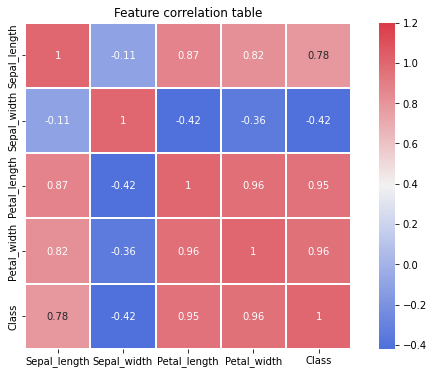

In [56]:
corrMatt = iris_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Feature correlation table')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=True, cmap=cmap,
ax=ax, annot=True, linewidths=2)

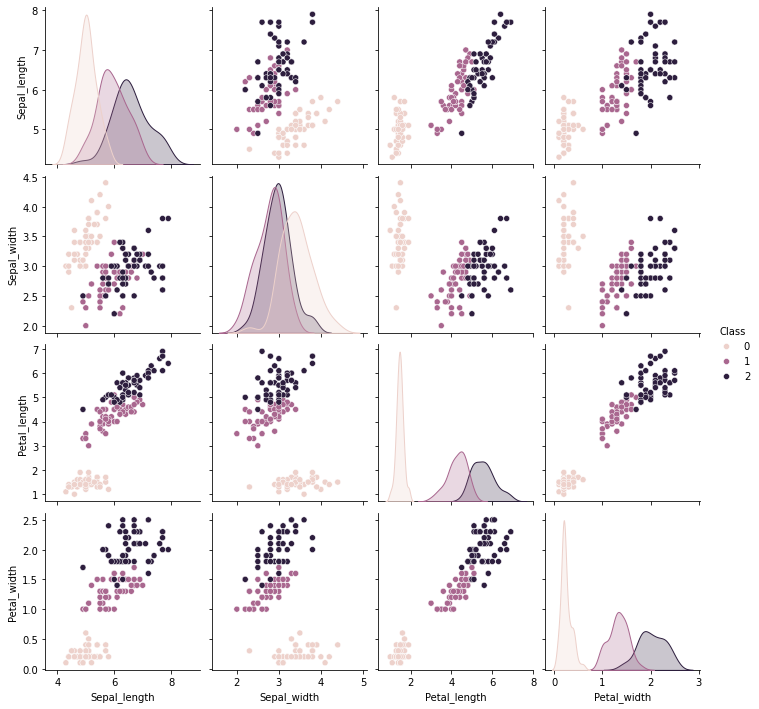

In [59]:
sns.pairplot(iris_df[list(iris_df.columns[:4]) + ['Class']], hue="Class")

## Finding of the data 

Looking at this data it appears that Sepal_width is a feature that could be dropped as it does not appear to not strongly corrliate to any of the classes.